# US Flight data analysis - Part 4
1. Load data into Pandas DataFrames using pixiedust.sampleData()
2. Create a networkx DiGraph from the flights DataFrame
3. Augment the airports DataFrame with columns that compute the different centrality indices
4. Visualize airports using networkx drawing APIs and pixiedust display() Mapbox Map
5. Compute the Dikjstra shorted path between 2 airports using ELAPSED_TIME and the centrality indices as weight
6. Build an ARIMA model for forecasting flight delays based on a window of historical data
6. Build the USFlightsAnalysis PixieApp that operationalizes the analytics above

## Install networkx library if needed

In [1]:
#!pip install networkx

## Import the modules at the start

In [2]:
import pixiedust
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

Pixiedust database opened successfully


## Load airports

In [3]:
airports = pixiedust.sampleData("https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airports.csv")

Downloaded 23867 bytes
Creating pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airports.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airports.csv'


## Load airlines

In [4]:
airlines = pixiedust.sampleData("https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airlines.csv")

Downloaded 359 bytes
Creating pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airlines.csv'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/airlines.csv'


## Load flights

In [5]:
flights = pixiedust.sampleData("https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/flights.zip")
flights["DEPARTURE_TIME"] = pd.to_datetime(flights["DEPARTURE_TIME"])

Extracting first item in zip file...
File extracted: flights.csv
Downloaded 86144241 bytes
Creating pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/flights.zip'. Please wait...
Loading file using 'pandas'
Successfully created pandas DataFrame for 'https://github.com/DTAIEB/Thoughtful-Data-Science/raw/master/chapter%209/USFlightsAnalysis/flights.zip'


## Explore the flights

In [6]:
display(flights)

YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_TIME,DEPARTURE_DELAY,ELAPSED_TIME,AIR_TIME,DISTANCE,ARRIVAL_DELAY,CANCELLED
2015,11,2,1,DL,2439,DAB,ATL,2015-11-02 18:12:00,13.0,92.0,60.0,366,12.0,0
2015,12,21,1,WN,2977,OAK,LAX,2015-12-21 05:55:00,0.0,69.0,50.0,337,-16.0,0
2015,2,25,3,DL,2114,GEG,SLC,2015-02-25 13:13:00,-4.0,95.0,72.0,546,-1.0,0
2015,4,3,5,DL,992,SDF,ATL,2015-04-03 08:38:00,-2.0,117.0,60.0,321,31.0,0
2015,7,23,4,MQ,3302,DFW,LIT,2015-07-23 20:32:00,-3.0,64.0,45.0,304,-15.0,0
2015,2,19,4,WN,1150,BDL,BWI,2015-02-19 08:02:00,-3.0,80.0,56.0,283,-8.0,0
2015,2,24,2,AA,1171,MIA,ORD,2015-02-24 13:12:00,-4.0,203.0,180.0,1197,-5.0,0
2015,4,20,1,WN,349,SLC,PHX,2015-04-20 09:20:00,-5.0,82.0,69.0,507,-18.0,0
2015,1,16,5,OO,5367,ONT,SFO,2015-01-16 11:16:00,71.0,74.0,59.0,363,57.0,0
2015,8,5,3,MQ,3435,OKC,ORD,2015-08-05 12:01:00,-10.0,108.0,93.0,693,-28.0,0


## Create a networkx graph from the flights DataFrame

In [7]:
edges = flights.groupby(["ORIGIN_AIRPORT", "DESTINATION_AIRPORT"])[["ELAPSED_TIME"]].mean()
edges

ELAPSED_TIME
ORIGIN_AIRPORT DESTINATION_AIRPORT              
ABE            ATL                    127.415350
               DTW                    101.923741
               ORD                    130.298762
ABI            DFW                     53.951591
ABQ            ATL                    174.822278
               BWI                    215.028112
               CLT                    193.168421
               DAL                     95.107051
               DEN                     75.268199
               DFW                    103.641714
               HOU                    115.464363
               IAH                    125.548387
               JFK                    232.306273
               LAS                     88.696897
               LAX                    120.412549
               MCI                    106.373802
               MCO                    213.412371
               MDW                    155.709375
               MSP                    147.079070
               OAK                    140.355612
               ORD                    163.952919
               PDX                    164.737991
               PHX                     77.266639
               SAN                    105.137480
               SEA                    182.432099
               SFO                    157.303030
               SLC                     93.917460
ABR            MSP                     69.577677
ABY            ATL                     54.341801
ACK            BOS                     44.504348
...                                          ...
TYS            DTW                     95.333333
               EWR                    115.358108
               IAD                     86.333333
               IAH                    142.137748
               LGA                    117.721311
               ORD                    106.696127
UST            IAD                    108.333333
               TTN                    123.751773
VEL            SLC                     48.215000
VLD            ATL                     63.770811
VPS            ATL                     70.170242
               DFW                    132.716329
               IAH                    112.542857
WRG            KTN                     32.663580
               PSG                     23.658462
WYS            SLC                     64.942308
XNA            ATL                    104.153055
               CVG                    100.508021
               DEN                    122.288462
               DFW                     78.007473
               EWR                    176.908213
               IAH                    103.303146
               LGA                    168.770833
               MSP                    116.766376
               ORD                    107.308907
               SFO                    249.901961
               SLC                    155.000000
YAK            CDV                     49.193846
               JNU                     45.956923
YUM            PHX                     57.270227

[4656 rows x 1 columns]

## Reset the index for the airports DataFrame

In [8]:
edges = edges.reset_index()
edges

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,ELAPSED_TIME
0,ABE,ATL,127.415350
1,ABE,DTW,101.923741
2,ABE,ORD,130.298762
3,ABI,DFW,53.951591
4,ABQ,ATL,174.822278
5,ABQ,BWI,215.028112
6,ABQ,CLT,193.168421
7,ABQ,DAL,95.107051
8,ABQ,DEN,75.268199
9,ABQ,DFW,103.641714


## Create a Directed Graph from the flights

In [9]:
flight_graph = nx.from_pandas_edgelist(
    flights, "ORIGIN_AIRPORT","DESTINATION_AIRPORT", "ELAPSED_TIME", 
    create_using = nx.DiGraph() )

## Visualize the graph using a random layout

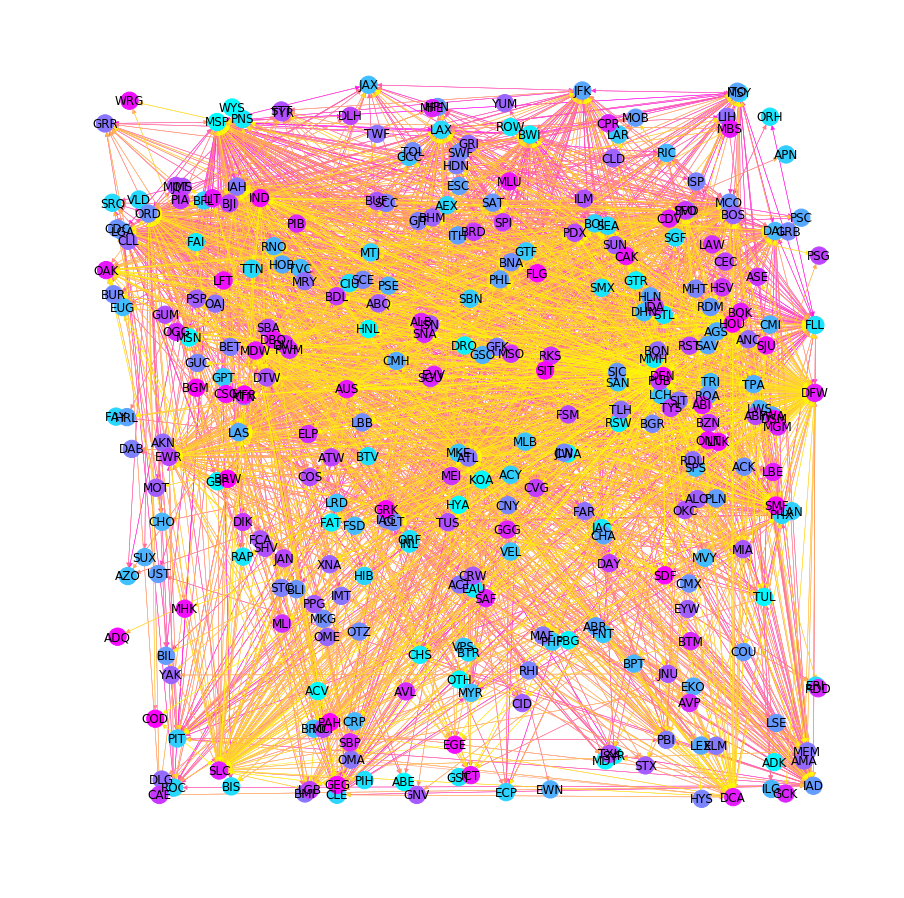

In [10]:
import matplotlib.cm as cm
fig = plt.figure(figsize = (12,12))
nx.draw(flight_graph, arrows=True, with_labels=True, width = 0.5,style="dotted",
        node_color=range(len(flight_graph)), cmap=cm.get_cmap(name="cool"),
        edge_color=range(len(flight_graph.edges)), edge_cmap=cm.get_cmap(name="spring"),
        pos = nx.random_layout(flight_graph)
       )
plt.show()

## Augment the airports DataFrame with DEGREE centrality index

In [11]:
degree_df = pd.DataFrame([{"IATA_CODE":k, "DEGREE":v} for k,v in flight_graph.degree], columns=["IATA_CODE", "DEGREE"])

In [12]:
airports_centrality = pd.merge(airports, degree_df, on='IATA_CODE')

In [13]:
airports_centrality

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEGREE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,6
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,46
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018,6
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052,2
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862,2
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717,20
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603,2


## Display a MapBox box of the airports

In [14]:
display(airports_centrality)

## Compute the centrality for PAGE_RANK, CLOSENESS and BETWEENNESS and add the computed values as columns to the airport DataFrame

In [15]:
from six import iteritems
def compute_centrality(g, centrality_df, compute_fn, col_name, *args, **kwargs): 
    # create a temporary DataFrame that contains the computed centrality values
    temp_df = pd.DataFrame(
        [{"IATA_CODE":k, col_name:v} for k,v in iteritems(compute_fn(g, *args, **kwargs))], 
        columns=["IATA_CODE", col_name]
    )
    # make sure to remove the col_name from the centrality_df is already there
    if col_name in centrality_df.columns:
        centrality_df.drop([col_name], axis=1, inplace=True)
    # merge the 2 DataFrame on the IATA_CODE column
    centrality_df = pd.merge(centrality_df, temp_df, on='IATA_CODE')
    return centrality_df

In [16]:
airports_centrality = compute_centrality(flight_graph, airports_centrality, nx.pagerank, "PAGE_RANK")
airports_centrality = compute_centrality(flight_graph, airports_centrality, nx.closeness_centrality, "CLOSENESS")
airports_centrality = compute_centrality(
    flight_graph, airports_centrality, nx.betweenness_centrality, "BETWEENNESS", k = len(flight_graph))
airports_centrality

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,DEGREE,PAGE_RANK,CLOSENESS,BETWEENNESS
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040,6,0.001020,0.422368,0.000000e+00
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190,2,0.000670,0.392901,0.000000e+00
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919,46,0.004178,0.497674,6.039058e-05
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183,2,0.000649,0.379433,0.000000e+00
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447,2,0.000657,0.402256,0.000000e+00
5,ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018,6,0.000912,0.362302,0.000000e+00
6,ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052,2,0.000670,0.392901,0.000000e+00
7,ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862,2,0.000640,0.362712,0.000000e+00
8,ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717,20,0.002107,0.432032,1.969935e-05
9,ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603,2,0.000754,0.337539,0.000000e+00


## Get the top 10 airports according to each centrality indices

In [17]:
for col_name in ["DEGREE", "PAGE_RANK", "CLOSENESS", "BETWEENNESS"]:
    print("{} : {}".format(
        col_name, 
        airports_centrality.nlargest(10, col_name)["IATA_CODE"].values)
    )

DEGREE : ['ATL' 'ORD' 'DFW' 'DEN' 'MSP' 'IAH' 'DTW' 'SLC' 'EWR' 'LAX']
PAGE_RANK : ['ATL' 'ORD' 'DFW' 'DEN' 'MSP' 'IAH' 'DTW' 'SLC' 'SFO' 'LAX']
CLOSENESS : ['ATL' 'ORD' 'DFW' 'DEN' 'MSP' 'IAH' 'DTW' 'SLC' 'EWR' 'LAX']
BETWEENNESS : ['ATL' 'DFW' 'ORD' 'DEN' 'MSP' 'SLC' 'DTW' 'ANC' 'IAH' 'SFO']


## Visualize the graph for the top airport (ATL) and its immediate neighbors

In [18]:
import matplotlib.cm as cm
def visualize_neighbors(parent_node, figsize=(12,12)):
    fig = plt.figure(figsize = figsize)
    # Create a subgraph and add an edge from the parents node to all its neighbors
    graph = nx.DiGraph()
    for neighbor in flight_graph.neighbors(parent_node):
        graph.add_edge(parent_node, neighbor)
    # draw the subgraph
    nx.draw(graph, arrows=True, with_labels=True, width = 0.5,style="dotted",
            node_color=range(len(graph)), cmap=cm.get_cmap(name="cool"),
            edge_color=range(len(graph.edges)), edge_cmap=cm.get_cmap(name="spring"),
           )
    plt.show()

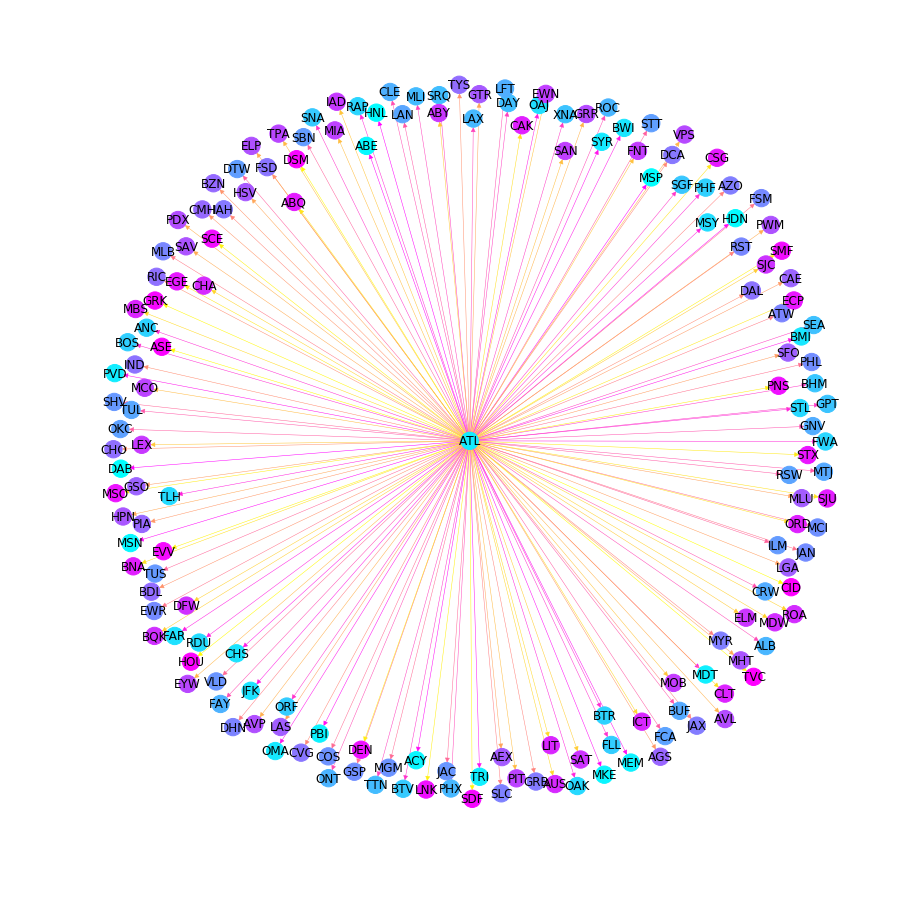

In [19]:
visualize_neighbors("ATL")

## Compute the Dijkstra shortest path using the different centrality indices

In [20]:
# use a cache so we don't recompute the weight for the same airport every time
cache = {}
def compute_weight(centrality_index_col):
    if centrality_index_col == "ELAPSED_TIME":
        return centrality_index_col

    # wrapper function that conform to the dijkstra weight argument
    def wrapper(source, target, attribute):
        # try the cache first and compute the weight if not there
        source_weight = cache.get(source, None)
        if source_weight is None:
            # look up the airports_centrality for the value
            source_weight = airports_centrality.loc[airports_centrality["IATA_CODE"] == source][centrality_index_col].values[0]
            cache[source] = source_weight
        target_weight = cache.get(target, None)
        if target_weight is None:
            target_weight = airports_centrality.loc[airports_centrality["IATA_CODE"] == target][centrality_index_col].values[0]
            cache[target] = target_weight
        # Return weight is inversely proportional to the computed weighted since the 
        # Dijkstra algorithm give precedence to shorter distances
        return float(1/source_weight) + float(1/target_weight)
    return wrapper

In [21]:
for col_name in ["ELAPSED_TIME", "DEGREE", "PAGE_RANK", "CLOSENESS"]:
    #clear the cache
    cache.clear()
    print("{} : {}".format(
        col_name,
        nx.dijkstra_path(flight_graph, "BOS", "PSC", weight=compute_weight(col_name))
    ))

ELAPSED_TIME : ['BOS', 'MSP', 'PSC']
DEGREE : ['BOS', 'DEN', 'PSC']
PAGE_RANK : ['BOS', 'DEN', 'PSC']
CLOSENESS : ['BOS', 'DEN', 'PSC']


## Create a generic method that select the flights for a particular airline and display the results as a Line Chart

In [22]:
def compute_delay_airline_df(airline, org_airport=None):
    # create a mask for selecting the data
    mask = (flights["AIRLINE"] == airline)
    if org_airport is not None:
        # Add the org_airport to the mask
        mask = mask & (flights["ORIGIN_AIRPORT"] == org_airport)
    # Apply the mask to the Pandas dataframe
    df = flights[mask]
    # Convert the YEAR, MONTH and DAY column into a DateTime
    df["DATE"] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])
    # Select only the columns that we need
    return df[["DATE", "ARRIVAL_DELAY"]]

In [23]:
bos_delay = compute_delay_airline_df("DL", "BOS")
display(bos_delay)

# Building a model for the flights delay

## Select the flights for a specific airline that go to a specific destination

In [136]:
df = flights[(flights["AIRLINE"] == "DL") & (flights["DESTINATION_AIRPORT"] == "BOS")]

## Plot the ACF and PACF to explore patterns in the time series

/Users/dtaieb/anaconda/envs/dashboard/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/dtaieb/anaconda/envs/dashboard/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


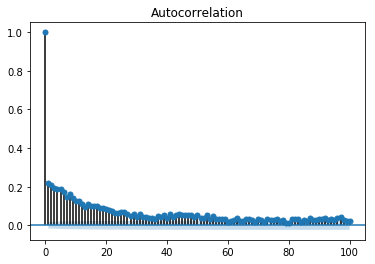

In [25]:
import statsmodels.tsa.api as smt
smt.graphics.plot_acf(df['ARRIVAL_DELAY'], lags=100)
plt.show()

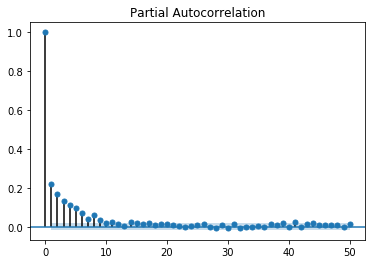

In [26]:
import statsmodels.tsa.api as smt
smt.graphics.plot_pacf(df['ARRIVAL_DELAY'], lags=50)
plt.show()

## Make the time series stationary by doing a log difference transformation

In [27]:
import numpy as np
train_set, test_set = df[:-14], df[-14:]
train_set.index = train_set["DEPARTURE_TIME"]
test_set.index = test_set["DEPARTURE_TIME"]
logdf = np.log(train_set['ARRIVAL_DELAY'])
logdf.index = train_set['DEPARTURE_TIME']
logdf_diff = pd.DataFrame(logdf - logdf.shift()).reset_index()
logdf_diff.replace([np.inf, -np.inf], np.nan, inplace=True)
logdf_diff.dropna(inplace=True)
display(logdf_diff)

## Plot the ACF and PACF on the log difference

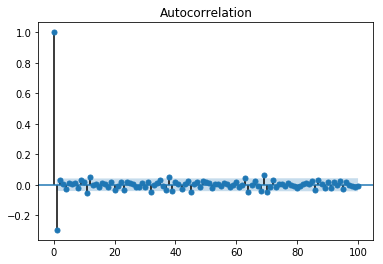

In [28]:
import statsmodels.tsa.api as smt
smt.graphics.plot_acf(logdf_diff["ARRIVAL_DELAY"], lags=100)
plt.show()

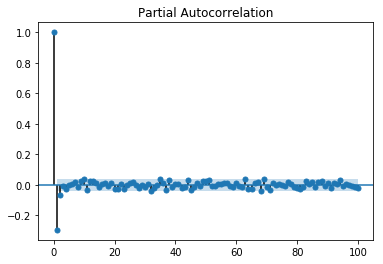

In [29]:
smt.graphics.plot_pacf(logdf_diff["ARRIVAL_DELAY"], lags=100)
plt.show()

## Build an ARIMA forecasting model

In [30]:
from statsmodels.tsa.arima_model import ARIMA

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    arima_model_class = ARIMA(train_set['ARRIVAL_DELAY'], dates=train_set['DEPARTURE_TIME'], order=(1,1,1))
    arima_model = arima_model_class.fit(disp=0)

    print(arima_model.resid.describe())

count    13882.000000
mean         0.003116
std         48.932043
min       -235.439689
25%        -17.446822
50%         -5.902274
75%          6.746263
max       1035.104295
dtype: float64


## Plot the prediction and compare with training set

/Users/dtaieb/anaconda/envs/dashboard/lib/python3.5/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


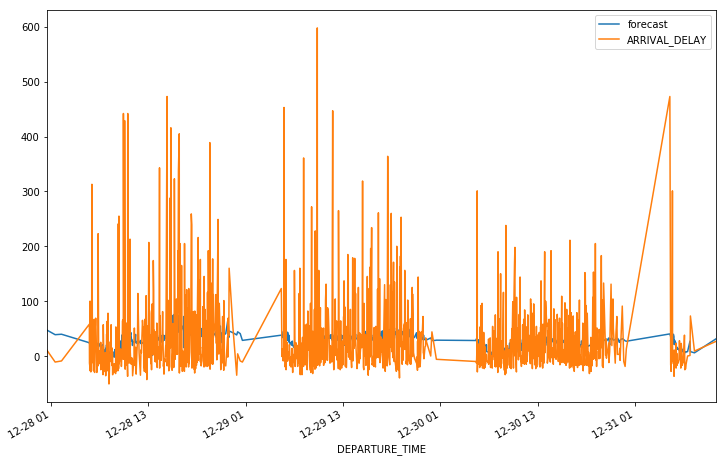

In [128]:
def plot_predict(model, dates_series, num_observations):
    fig,ax = plt.subplots(figsize = (12,8))
    model.plot_predict(
        start = dates_series[len(dates_series)-num_observations], 
        end = dates_series[len(dates_series)-1],
        ax = ax
    )
    plt.show()
plot_predict(arima_model, train_set['DEPARTURE_TIME'], 100)

In [130]:
def compute_test_set_predictions(train_set, test_set):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        history = train_set['ARRIVAL_DELAY'].values
        forecast = np.array([])
        for t in range(len(test_set)):
            prediction = ARIMA(history, order=(1,1,0)).fit(disp=0).forecast()
            history = np.append(history, test_set['ARRIVAL_DELAY'].iloc[t])
            forecast = np.append(forecast, prediction[0])
        return pd.DataFrame(
          {"forecast": forecast,
           "test": test_set['ARRIVAL_DELAY'],
           "Date": pd.date_range(start=test_set['DEPARTURE_TIME'].iloc[len(test_set)-1], periods = len(test_set))
          }
        )
        
results = compute_test_set_predictions(train_set, test_set)
display(results)


# Build the USFlightsAnalysis PixieApp
1. Allow the user to select an origin and destination airport
2. For each selected airport, display the select airport and its immediate neighbors
3. Show a MapBox map of all the airports
4. Provide a set of checkbox with various centrality indices. When selecting a centrality index, trigger a Dijkastra shorted path search based on the selected centrality index.
5. Display the shortest path on the map as an extra layer
6. Show a list of charts that show delay informations for each of the airlines that provide service from the origin airport
7. Show flight delay predictions for flight segments

## Implementation of the SearchShortestRouteApp child PixieApp

In [131]:
from pixiedust.display.app import *
from pixiedust.apps.mapboxBase import MapboxBase
from collections import OrderedDict

@PixieApp
class SearchShortestRouteApp(MapboxBase):
    def setup(self):
        self.org_airport = self.parent_pixieapp.options.get("org_airport")
        self.dest_airport = self.parent_pixieapp.options.get("dest_airport")
        self.centrality_indices = OrderedDict([
            ("ELAPSED_TIME","rgba(256,0,0,0.65)"), 
            ("DEGREE", "rgba(0,256,0,0.65)"), 
            ("PAGE_RANK", "rgba(0,0,256,0.65)"),
            ("CLOSENESS", "rgba(128,0,128,0.65)")
        ])
        
    @route()
    def main_screen(self):
        return """
<div class="container-fluid">
    <div class="form-group col-sm-2" style="padding-right:10px;">
        <div><strong>Centrality Indices</strong></div>
        {% for centrality in this.centrality_indices.keys() %}
        <div class="rendererOpt checkbox checkbox-primary">
            <input type="checkbox" pd_refresh="flight_map{{prefix}}" 
                pd_script="self.compute_toggle_centrality_layer('{{this.org_airport}}', '{{this.dest_airport}}', '{{centrality}}')">
            <label>{{centrality}}</label>
        </div>      
        {%endfor%}
    </div>
    <div class="form-group col-sm-10">
        <h1 class="rendererOpt">Select a centrality index to show the shortest flight path
        </h1>
        <div id="flight_map{{prefix}}" pd_entity="self.airports_centrality" pd_render_onload>
            <pd_options>
            {
              "keyFields": "LATITUDE,LONGITUDE",
              "valueFields": "AIRPORT,DEGREE,PAGE_RANK,ELAPSED_TIME,CLOSENESS",
              "custombasecolorsecondary": "#fffb00",
              "colorrampname": "Light to Dark Red",
              "handlerId": "mapView",
              "quantiles": "0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0",
              "kind": "choropleth",
              "rowCount": "1000",
              "numbins": "5",
              "mapboxtoken": "pk.eyJ1IjoibWFwYm94IiwiYSI6ImNpejY4M29iazA2Z2gycXA4N2pmbDZmangifQ.-g_vE53SD2WrJ6tFX7QHmA",
              "custombasecolor": "#ffffff"
            }
            </pd_options>
        </div>
    </div>
</div>
"""
    
    def get_airport_location(self, airport_code):
        row = airports_centrality.loc[airports["IATA_CODE"] == airport_code]
        if row is not None:
            return [row["LONGITUDE"].values[0], row["LATITUDE"].values[0]]
        return None
    
    def compute_toggle_centrality_layer(self, org_airport, dest_airport, centrality):
        cache.clear()
        cities = nx.dijkstra_path(flight_graph, org_airport, dest_airport, weight=compute_weight(centrality))
        layer_index = self.get_layer_index(centrality, {
            "name": centrality,
            "geojson": {
                "type": "FeatureCollection",
                "features":[
                    {"type":"Feature",
                     "properties":{"route":"{} to {}".format(cities[i], cities[i+1])},
                     "geometry":{
                         "type":"LineString",
                         "coordinates":[
                             self.get_airport_location(cities[i]),
                             self.get_airport_location(cities[i+1])
                         ]
                     }
                    } for i in range(len(cities) - 1)
                ]
            },
            "paint":{
                "line-width": 8,
                "line-color": self.centrality_indices[centrality]
            }
        })
        self.toggleLayer(layer_index)
        
    
    

## Implementation of the AirlinesApp child PixieApp that provides a dashboard with Line charts showing the arrival delay for all the airlines that provide service for the origin airport

In [132]:
@PixieApp
class AirlinesApp():
    def setup(self):
        self.org_airport = self.parent_pixieapp.options.get("org_airport")
        self.dest_airport = self.parent_pixieapp.options.get("dest_airport")
        self.airlines = flights[flights["ORIGIN_AIRPORT"] == self.org_airport].groupby("AIRLINE").size().index.values.tolist()
        self.airlines = [(a, airlines.loc[airlines["IATA_CODE"] == a]["AIRLINE"].values[0]) for a in self.airlines]

    @route()
    def main_screen(self):
        return """
<div class="container-fluid">
    {%for airline_code, airline_name in this.airlines%}
    <div class="row" style="max-e">
        <h1 style="color:red">{{airline_name}}</h1>
        <div class="col-sm-6">
            <div pd_render_onload pd_options="delay_org_airport=true;airline_code={{airline_code}};airline_name={{airline_name}}"></div>
        </div>
        <div class="col-sm-6">
            <div pd_render_onload pd_options="delay_org_airport=false;airline_code={{airline_code}};airline_name={{airline_name}}"></div>
        </div>
    </div>
    {%endfor%}
</div>
        """
    
    def compute_delay_airline_df(self, airline, delay_org_airport):
        mask = (flights["AIRLINE"] == airline)
        if delay_org_airport == "true":
            mask = mask & (flights["ORIGIN_AIRPORT"] == self.org_airport)
        df = flights[mask]
        df["DATE"] = pd.to_datetime(flights[['YEAR','MONTH', 'DAY']])
        return df[["DATE", "ARRIVAL_DELAY"]]
    
    @route(delay_org_airport="*",airline_code="*", airline_name="*")
    @templateArgs
    def delay_airline_screen(self, delay_org_airport, airline_code, airline_name):
        mask = (flights["AIRLINE"] == airline_code)
        if delay_org_airport == "true":
            mask = mask & (flights["ORIGIN_AIRPORT"] == self.org_airport)
        average_delay = round(flights[mask]["ARRIVAL_DELAY"].mean(), 2)
        return """
{%if delay_org_airport == "true" %}
<h4>Delay chart for all flights out of {{this.org_airport}}</h4>
{%else%}
<h4>Delay chart for all flights</h4>
{%endif%}
<h4 style="margin-top:5px">Average delay: {{average_delay}} minutes</h4>
<div pd_render_onload pd_entity="compute_delay_airline_df('{{airline_code}}', '{{delay_org_airport}}')">
    <pd_options>
    {
      "keyFields": "DATE",
      "handlerId": "lineChart",
      "valueFields": "ARRIVAL_DELAY",
      "noChartCache": "true"
    }
    </pd_options>
</div>
        """

## Implementation of the PredictDelayApp child PixieApp that forecast delays based on the history data for a particular airline and airport

In [133]:
import warnings
import numpy as np
from statsmodels.tsa.arima_model import ARIMA

@PixieApp
class PredictDelayApp():
    def setup(self):
        self.org_airport = self.parent_pixieapp.options.get("org_airport")
        self.dest_airport = self.parent_pixieapp.options.get("dest_airport")
        self.airlines = flights[flights["ORIGIN_AIRPORT"] == self.org_airport].groupby("AIRLINE").size().index.values.tolist()
        self.airlines = [(a, airlines.loc[airlines["IATA_CODE"] == a]["AIRLINE"].values[0]) for a in self.airlines]
        path = nx.dijkstra_path(flight_graph, self.org_airport, self.dest_airport, weight=compute_weight("DEGREE"))
        self.paths = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        
    @route()
    def main_screen(self):
        return """
<div class="container-fluid">
    <div class="row">
        <div class="col-sm-6">
            <div class="rendererOpt" style="font-weight:bold">
                Select a flight segment:
            </div>
            <div>
                <select id="segment{{prefix}}" pd_refresh="prediction_graph{{prefix}}">
                    <option value="" selected></option>
                    {%for start, end in this.paths %}
                    <option value="{{start}}:{{end}}">{{start}} -> {{end}}</option>
                    {%endfor%}
                </select>
            </div>
        </div>
        <div class="col-sm-6">
            <div class="rendererOpt" style="font-weight:bold">
                Select an airline:
            </div>
            <div>
                <select id="airline{{prefix}}" pd_refresh="prediction_graph{{prefix}}">
                    <option value="" selected></option>
                    {%for airline_code, airline_name in this.airlines%}
                    <option value="{{airline_code}}">{{airline_name}}</option>
                    {%endfor%}
                </select>
            </div>
        </div>
    </div>
    <div class="row">
        <div class="col-sm-12">
            <div id="prediction_graph{{prefix}}" 
                pd_options="flight_segment=$val(segment{{prefix}});airline=$val(airline{{prefix}})">
            </div>
        </div>
    </div>
</div>
        """
    
    @route(flight_segment="*", airline="*")
    @captureOutput
    def predict_screen(self, flight_segment, airline):
        if flight_segment is None or flight_segment == "":
            return "<div>Please select a flight segment</div>"
        airport = flight_segment.split(":")[1]
        mask = (flights["DESTINATION_AIRPORT"] == airport)
        if airline is not None and airline != "":
            mask = mask & (flights["AIRLINE"] == airline)
        df = flights[mask]
        df.index = df["DEPARTURE_TIME"]
        df = df.tail(50000)
        df = df[~df.index.duplicated(keep='first')]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            arima_model_class = ARIMA(df["ARRIVAL_DELAY"], dates=df['DEPARTURE_TIME'], order=(1,1,1))
            arima_model = arima_model_class.fit(disp=0)
            fig, ax = plt.subplots(figsize = (12,8))
            num_observations = 100  
            date_series = df["DEPARTURE_TIME"]
            arima_model.plot_predict(
                start = str(date_series[len(date_series)-num_observations]), 
                end = str(date_series[len(date_series)-1]),
                ax = ax
            )
            plt.show()


## Implementation of the RouteAnalysisApp that provides the main layout for the Route Analysis screen

In [134]:
from pixiedust.apps.template import TemplateTabbedApp

@PixieApp
class RouteAnalysisApp(TemplateTabbedApp):
    def setup(self):
        self.apps = [
            {"title": "Search Shortest Route", "app_class": "SearchShortestRouteApp"},
            {"title": "Explore Airlines", "app_class": "AirlinesApp"},
            {"title": "Flight Delay Prediction", "app_class": "PredictDelayApp"}
        ]

## Implementation of the main USFlightsAnalysis PixieApp

In [135]:
@PixieApp
class USFlightsAnalysis():
    @route()
    def main_screen(self):
        return """
<style>
    div.outer-wrapper {
        display: table;width:100%;height:300px;
    }
    div.inner-wrapper {
        display: table-cell;vertical-align: middle;height: 100%;width: 100%;
    }
</style>
<div class="outer-wrapper">
    <div class="inner-wrapper">
        <div class="col-sm-6">
            <div class="rendererOpt" style="font-weight:bold">
                Select origin airport:
            </div>
            <div>
                <select id="origin_airport{{prefix}}" pd_refresh="origin_graph{{prefix}}">
                    <option value="" selected></option>
                    {%for code, airport in this.get_airports() %}
                    <option value="{{code}}">{{code}} - {{airport}}</option>
                    {%endfor%}
                </select>
            </div>
            <div id="origin_graph{{prefix}}" pd_options="visualize_graph=$val(origin_airport{{prefix}})"></div>
        </div>
        <div class="input-group col-sm-6">
            <div class="rendererOpt" style="font-weight:bold">
                Select destination airport:
            </div>
            <div>
                <select id="destination_airport{{prefix}}" pd_refresh="destination_graph{{prefix}}">
                    <option value="" selected></option>
                    {%for code, airport in this.get_airports() %}
                    <option value="{{code}}">{{code}} - {{airport}}</option>
                    {%endfor%}
                </select>
            </div>
            <div id="destination_graph{{prefix}}" 
                pd_options="visualize_graph=$val(destination_airport{{prefix}})">
            </div>
        </div>
    </div>
</div>
<div style="text-align:center">
    <button class="btn btn-default" type="button" 
        pd_options="org_airport=$val(origin_airport{{prefix}});dest_airport=$val(destination_airport{{prefix}})">
        <pd_script type="preRun">
            if ($("#origin_airport{{prefix}}").val() == "" || $("#destination_airport{{prefix}}").val() == ""){
                alert("Please select an origin and destination airport");
                return false;
            }
            return true;
        </pd_script>
        Analyze
    </button>
</div>
"""
    def get_airports(self):
        return [tuple(l) for l in airports_centrality[["IATA_CODE", "AIRPORT"]].values.tolist()]
    
    @route(visualize_graph="*")
    @captureOutput
    def visualize_graph_screen(self, visualize_graph):
        visualize_neighbors(visualize_graph, (5,5))
        
    @route(org_airport="*", dest_airport="*")
    def analyze_route(self, org_airport, dest_airport):
        return """
<div pd_app="RouteAnalysisApp" 
     pd_options="org_airport={{org_airport}};dest_airport={{dest_airport}}" 
     pd_render_onload>
</div>
        """
    
app = USFlightsAnalysis()
app.run()